## Description
Notebook for loading, cleaning and extracting labels from cleaned and aligned UTK faces dataset

https://susanqq.github.io/UTKFace/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as iio
from pathlib import Path
import re

print('Loading images...')

images = list()
filename = list()
for file in sorted(Path("Data/UTK/UTKFace").iterdir()):
    im = iio.imread(file)
    images.append(im)
    filename.append(str(file))
    
# Removing observations with missing information
missing_id = [15015,20793,20794] # These 3 images are missing a label on race
images = [i for j, i in enumerate(images) if j not in missing_id]
filename = [i for j, i in enumerate(filename) if j not in missing_id]

# Cleaning name string by removing folder name
clean_names = []
for i in range(len(images)):
    name = filename[i]
    clean_names.append(name[17:]) # removing "Data/UTK/UTKFace" from filename

age=[]
gender=[]
race=[]


print('Creating labels...')

# Finding and saving age, gender and race features from file names
for ID in range(len(images)):
    count = 0
    for m in re.finditer('_',clean_names[ID]):
        count += 1
        pic = clean_names[ID]
        if count == 1:
            age.append(int(pic[0:m.end()-1]))
        if count == 2:
            gender.append(int(pic[m.start()-1:m.end()-1]))
        if count == 3:
            race.append(int(pic[m.start()-1:m.end()-1]))
                 
age = np.array(age)
gender = np.array(gender)
race = np.array(race)
images = np.array(images)
print('Done\n')


print(f'Image Dimensions\t {images.shape} [N x H x W x C]')
print(f'Label Shape Age\t\t {age.shape}')
print(f'Label Shape Gender\t {gender.shape}')
print(f'Label Shape Race\t {race.shape}')

Loading images...
Creating labels...
Done

Image Dimensions	 (23705, 200, 200, 3) [N x H x W x C]
Label Shape Age		 (23705,)
Label Shape Gender	 (23705,)
Label Shape Race	 (23705,)


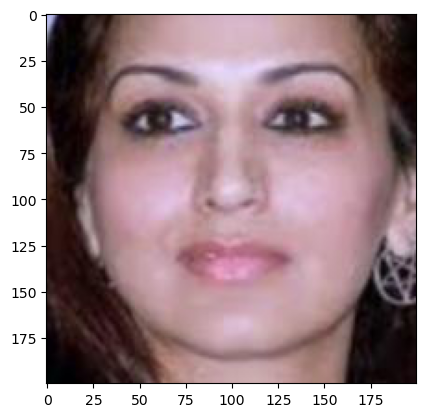

Age	 29
Gender	 1
Race	 3


In [2]:
# Plotting 
ID=10000 # choose image to plot
plt.imshow(images[ID])
plt.show()
print('Age\t',age[ID])
print('Gender\t',gender[ID])
print('Race\t',race[ID])

In [3]:
# Compressing images
from scipy import misc
import matplotlib.pyplot as plt
import cv2
import numpy as np
n_images = images.shape[0]
compress_dimension = 32
compress = np.zeros([n_images,compress_dimension,compress_dimension,3],dtype=np.float32)
for i in range(n_images):
    res = cv2.resize(images[i], dsize=(compress_dimension, compress_dimension), interpolation=cv2.INTER_AREA)    
    compress[i] = res    

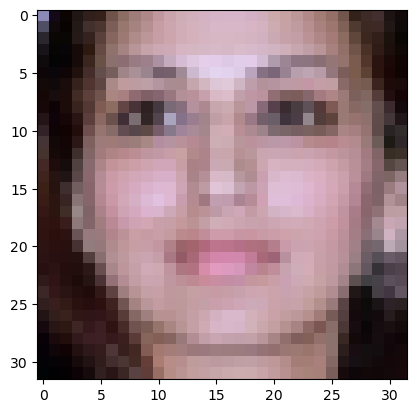

Age	 29
Gender	 1
Race	 3


In [4]:
ID = 10000
imgplot = plt.imshow(compress[ID]/255)
plt.show()
print('Age\t',age[ID])
print('Gender\t',gender[ID])
print('Race\t',race[ID])

In [5]:
import pickle

output = open('Data/UTK/images.pkl', 'wb')
pickle.dump(images, output)
output.close()

output = open('Data/UTK/utk_compress.pkl', 'wb')
pickle.dump(compress, output)
output.close()

output = open('Data/UTK/age.pkl', 'wb')
pickle.dump(age, output)
output.close()

output = open('Data/UTK/sex.pkl', 'wb')
pickle.dump(gender, output)
output.close()

output = open('Data/UTK/race.pkl', 'wb')
pickle.dump(race, output)
output.close()